In [118]:
import requests


def import_text(url: str) -> str:
    """
    Imports text content from a specified URL.
    Basic version - doesn't support errors handling.

    Args:
        url (str): The direct URL to the text file.

    Returns:
        The full text content.
    """

    response = requests.get(url)
    response.encoding = "utf-8"
    return response.text


In [119]:
import re


def preprocess_text(raw_text: str) -> list[str]:
    """
    Preprocesses the provided text to return list of applicable words.
    """
    # Cleaning Header (ISBN)
    _, separator, valid_text = raw_text.partition("ISBN")
    if separator:
        processed_text = valid_text
    else:
        processed_text = raw_text

    # Cleaning Footer (-----)
    valid_text, separator, _ = processed_text.rpartition("-----")
    if separator:
        processed_text = valid_text

    # Removing Chapter headers, assuming that there are 12 chapters in Pan Tadeusz book
    pattern = r"Księga (?:pierwsza|druga|trzecia|czwarta|piąta|szósta|siódma|ósma|dziewiąta|dziesiąta|jedenasta|dwunasta)\s*\?"
    processed_text = re.sub(pattern, "", processed_text)

    # Extracting words
    pattern_only_words = r"\b[A-Za-zĄĘŚĆŻŹÓŁŃąęśćżźółń]+\b"
    processed_text_list = re.findall(pattern_only_words, processed_text)

    # Filtering length and using lowercase letters
    processed_text_list = [
        word.lower() for word in processed_text_list if len(word) > 3
    ]

    return processed_text_list

In [120]:
def get_longest_words(words_list: list[str]) -> list[str]:
    """
    Exercise 1.
    Returns a list of ten longest words from a defined list.
    """

    words_lengths_dict: dict[str, int] = {}

    for word in words_list:
        words_lengths_dict[word] = len(word)

    words_lengths_dict = dict(
        sorted(words_lengths_dict.items(), key=lambda x: x[1], reverse=True)
    )
    keys = list(words_lengths_dict)
    return keys[:10]

In [121]:
def get_frequent_words(words_list: list[str]) -> list[str]:
    """
    Exercise 2.
    Returns a list of ten most frequent words from a defined list.
    """

    words_counter_dict: dict[str, int] = {}

    for word in words_list:
        if word in words_counter_dict:
            words_counter_dict[word] += 1
        else:
            words_counter_dict[word] = 1

    words_counter_dict = dict(
        sorted(words_counter_dict.items(), key=lambda x: x[1], reverse=True)
    )
    keys = list(words_counter_dict)
    return keys[:10]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray  # Needed for type hinting
from typing import Any  # Needed for type hinting


def lengths_histogram(words_list: list[str]) -> tuple[NDArray[Any], NDArray[Any]]:
    """
    Exercise 3.
    Prints a histogram of word lengths.
    Each word is counted separately, so repeated words are not counted only once.
    """
    lengths_list = [len(word) for word in words_list]

    min_len = min(lengths_list)
    max_len = max(lengths_list)
    bins = range(min_len, max_len + 2)
    plt.hist(lengths_list, bins=bins, edgecolor="black", align="left")
    plt.title(
        f"Distribution of word lengths in 'Pan Tadeusz' text (only words with length > 3)"
    )
    plt.xlabel("Word length")
    plt.ylabel("Number of occurences")
    plt.xticks(range(min_len, max_len + 1))
    plt.grid(axis="y")
    plt.show()

    counts, bin_edges = np.histogram(lengths_list, bins)
    return counts, bin_edges

In [123]:
def save_to_file(data_to_save: list[Any]):
    """
    Saves the passed data to results.txt file
    """
    with open("my_results.txt", "w") as file:
        for line in data_to_save:
            file.write(line + "\n")  # You must add "\n" to make a new line

Main code (only imperative version):

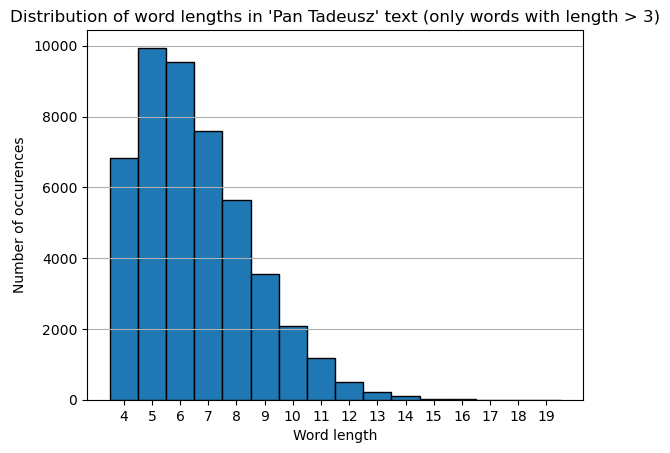

Most frequent words: ['lecz', 'jest', 'rzekł', 'tylko', 'jako', 'mnie', 'hrabia', 'sędzia', 'więc', 'tadeusz']
Longest words: ['niebezpieczeństwach', 'białopiotrowiczowi', 'najprzykładniejszy', 'niebezpieczeństwem', 'nierozstrzygniony', 'białopiotrowiczem', 'niebezpieczeństwo', 'niebezpieczeństwa', 'rzeczypospolitej', 'najpiękniejszego']
Histogram y axis (counts): [6824 9944 9544 7604 5655 3564 2092 1169  510  213   99   31    8    5
    5    1]
Histogram x axis (bin_edges): [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [124]:
raw_text = import_text("https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt")
words_list = preprocess_text(raw_text)
frequent_words = get_frequent_words(words_list)  # Ex1
longest_words = get_longest_words(words_list)  # Ex2
y, x = lengths_histogram(words_list)  # Ex3

results_txt = [
    f"Most frequent words: {frequent_words}",
    f"Longest words: {longest_words}",
    f"Histogram y axis (counts): {y}",
    f"Histogram x axis (bin_edges): {x}",
]
print(*results_txt, sep="\n")
save_to_file(results_txt)